In [1]:
! pip install kaggle

In [2]:
! chmod 600 /content/kaggle.json

chmod: cannot access '/content/kaggle.json': No such file or directory


# Downloading Dataset from Kaggle
Make sure you have added your kaggle.json file in the working directory. Your API is required for downloading the dataset.

In [3]:
!kaggle datasets download -d sartajbhuvaji/brain-tumor-classification-mri


Dataset URL: https://www.kaggle.com/datasets/sartajbhuvaji/brain-tumor-classification-mri
License(s): MIT
 99% 86.0M/86.8M [00:02<00:00, 41.1MB/s]
100% 86.8M/86.8M [00:02<00:00, 33.1MB/s]


In [4]:
!unzip /content/brain-tumor-classification-mri.zip

Archive:  /content/brain-tumor-classification-mri.zip
  inflating: Testing/glioma_tumor/image(1).jpg  
  inflating: Testing/glioma_tumor/image(10).jpg  
  inflating: Testing/glioma_tumor/image(100).jpg  
  inflating: Testing/glioma_tumor/image(11).jpg  
  inflating: Testing/glioma_tumor/image(12).jpg  
  inflating: Testing/glioma_tumor/image(13).jpg  
  inflating: Testing/glioma_tumor/image(14).jpg  
  inflating: Testing/glioma_tumor/image(15).jpg  
  inflating: Testing/glioma_tumor/image(16).jpg  
  inflating: Testing/glioma_tumor/image(17).jpg  
  inflating: Testing/glioma_tumor/image(18).jpg  
  inflating: Testing/glioma_tumor/image(19).jpg  
  inflating: Testing/glioma_tumor/image(2).jpg  
  inflating: Testing/glioma_tumor/image(20).jpg  
  inflating: Testing/glioma_tumor/image(21).jpg  
  inflating: Testing/glioma_tumor/image(22).jpg  
  inflating: Testing/glioma_tumor/image(23).jpg  
  inflating: Testing/glioma_tumor/image(24).jpg  
  inflating: Testing/glioma_tumor/image(25).jpg

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [6]:
# Labelling of classes
import os

path = os.listdir('/content/Training/')
classes = {'no_tumor':0, 'pituitary_tumor':1, 'glioma_tumor':2, 'meningioma_tumor':3}

In [7]:
import cv2
X = []
Y = []
for cls in classes:
    pth = '/content/Training/'+cls
    for j in os.listdir(pth):
        img = cv2.imread(pth+'/'+j, 0)
        img = cv2.resize(img, (256,256))
        X.append(img)
        Y.append(classes[cls])

In [8]:
X = np.array(X)
Y = np.array(Y)

In [9]:
X_updated = X.reshape(len(X), -1)

In [10]:
np.unique(Y)

array([0, 1, 2, 3])

In [11]:
pd.Series(Y).value_counts()

,count
1,827
2,826
3,822
0,395


In [12]:
X.shape, X_updated.shape

((2870, 256, 256), (2870, 65536))

# Visualize the images

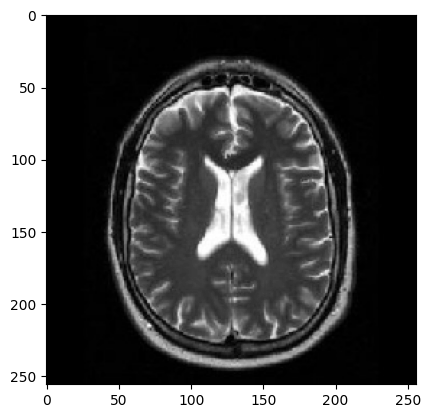

In [13]:
plt.imshow(X[11], cmap='gray')

In [14]:
# Splitting the dataset, using the stratify parameter because the classes are little imbalanced.
# stratify ensures the classes are distributed equally in the training and testing dataset
xtrain, xtest, ytrain, ytest = train_test_split(
    X_updated, Y,
    test_size=0.20,
    random_state=10,
    stratify=Y
)

In [15]:
xtrain.shape, xtest.shape


((2296, 65536), (574, 65536))

In [16]:
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())
xtrain = xtrain/255
xtest = xtest/255
print(xtrain.max(), xtrain.min())
print(xtest.max(), xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [17]:
# I didn't preferred applying because important medical information may get lost, but it is option for
# image classification tasks
from sklearn.decomposition import PCA

pca = PCA(.98)
#pca_train = pca.fit_transform(xtrain)
#pca_test = pca.transform(xtest)
#pca_train = xtrain
#pca_test = xtest

In [18]:
#print(pca_train.shape, pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features_in_)

# Model training

In [19]:
from sklearn.svm import SVC

In [20]:
sv = SVC(kernel='poly')
sv.fit(xtrain, ytrain)

SVC(kernel='poly')

In [21]:
print("Training Score:", sv.score(xtrain, ytrain))
print("Testing Score:", sv.score(xtest, ytest))

Training Score: 0.9825783972125436
Testing Score: 0.8466898954703833


In [22]:
pred = sv.predict(xtest)


In [23]:
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(ytest, pred)
print("Accuracy:", accuracy)

Accuracy: 0.8466898954703833


In [24]:
misclassified=np.where(ytest!=pred)
misclassified


(array([  3,   6,   9,  16,  25,  30,  31,  42,  45,  49,  59,  60,  62,
         63,  72,  73,  78,  79, 100, 105, 108, 109, 111, 121, 133, 134,
        135, 137, 138, 151, 152, 163, 170, 181, 182, 185, 199, 208, 216,
        217, 221, 223, 226, 240, 247, 272, 281, 282, 285, 288, 301, 310,
        312, 320, 329, 334, 349, 353, 354, 369, 392, 398, 417, 421, 423,
        424, 430, 433, 436, 445, 446, 471, 477, 487, 493, 504, 505, 511,
        521, 522, 524, 527, 531, 542, 551, 560, 571, 573]),)

In [25]:
print("Total Misclassified Samples: ",len(misclassified[0]))
print(pred[36],ytest[36])

Total Misclassified Samples:  88
0 0


# Results on test dataset

In [26]:
dec = {0:'no_tumor', 1: 'pituitary_tumor', 2:'glioma_tumor', 3:'meningioma_tumor'}

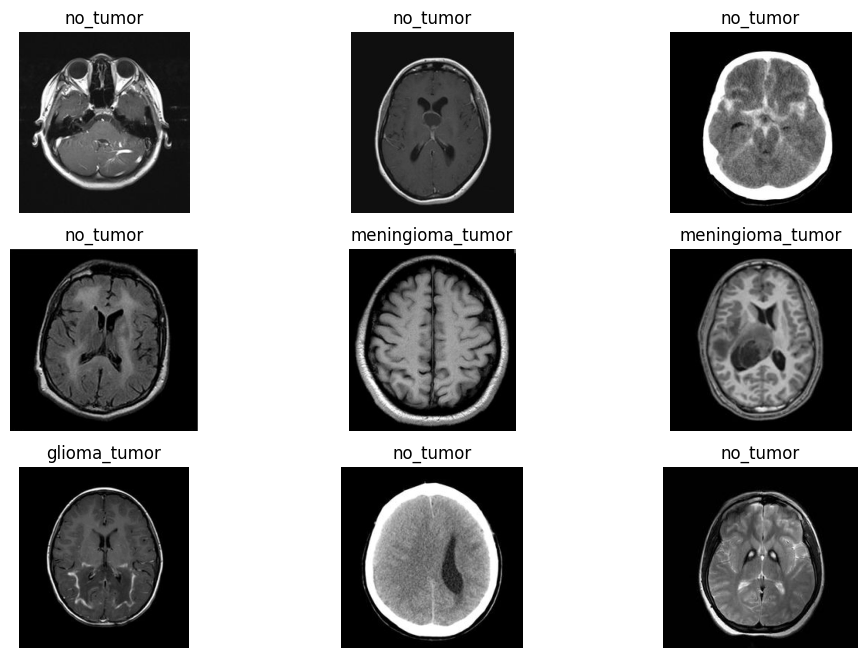

In [27]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Testing/')
c=1
for i in os.listdir('/content/Testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)

    img = cv2.imread('/content/Testing/no_tumor/'+i,0)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1

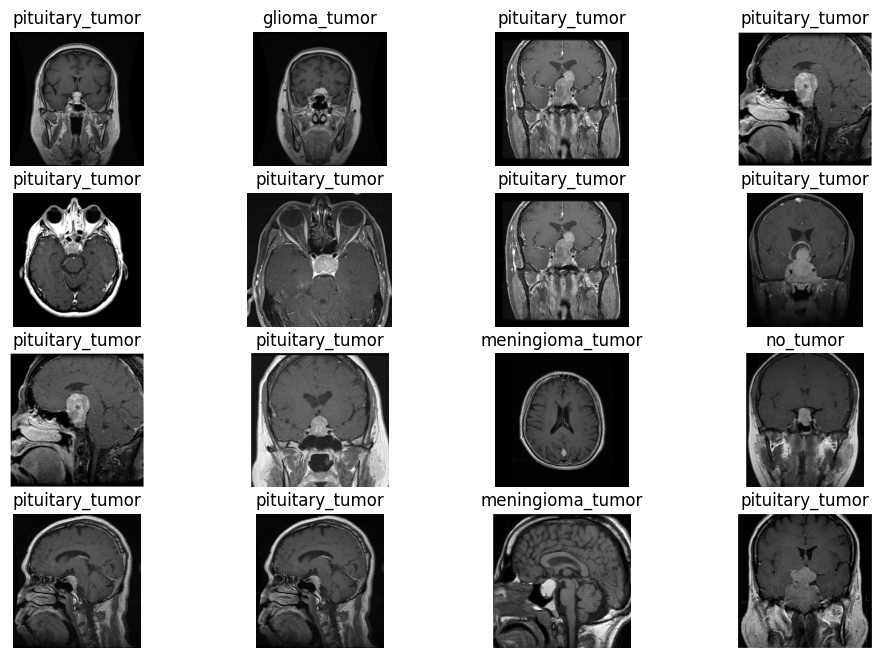

In [28]:
plt.figure(figsize=(12,8))
p = os.listdir('/content/Testing/')
c=1
for i in os.listdir('/content/Testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)

    img = cv2.imread('/content/Testing/pituitary_tumor/'+i,0)
    img1 = cv2.resize(img, (256,256))
    img1 = img1.reshape(1,-1)/255
    p = sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img, cmap='gray')
    plt.axis('off')
    c+=1